In [1]:
from sklearn.datasets import load_iris
from logistic_regression import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import numpy as np

from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = load_iris()
X, y = iris.data, iris.target
X.shape, y.shape

((150, 4), (150,))

In [3]:
table = print(tabulate(np.concatenate((X, y.reshape(-1,1)), axis=1), 
                       headers=['Sepal Length', 'Sepal Width', 'Petal Legth', 'Petal Width', 'Specie'],
                       tablefmt='rounded_grid')
              )
table

╭────────────────┬───────────────┬───────────────┬───────────────┬──────────╮
│   Sepal Length │   Sepal Width │   Petal Legth │   Petal Width │   Specie │
├────────────────┼───────────────┼───────────────┼───────────────┼──────────┤
│            5.1 │           3.5 │           1.4 │           0.2 │        0 │
├────────────────┼───────────────┼───────────────┼───────────────┼──────────┤
│            4.9 │           3   │           1.4 │           0.2 │        0 │
├────────────────┼───────────────┼───────────────┼───────────────┼──────────┤
│            4.7 │           3.2 │           1.3 │           0.2 │        0 │
├────────────────┼───────────────┼───────────────┼───────────────┼──────────┤
│            4.6 │           3.1 │           1.5 │           0.2 │        0 │
├────────────────┼───────────────┼───────────────┼───────────────┼──────────┤
│            5   │           3.6 │           1.4 │           0.2 │        0 │
├────────────────┼───────────────┼───────────────┼──────────────

In [4]:
print(f'Unique Values for Specie in Iris: {np.unique(y)}')

Unique Values for Specie in Iris: [0 1 2]


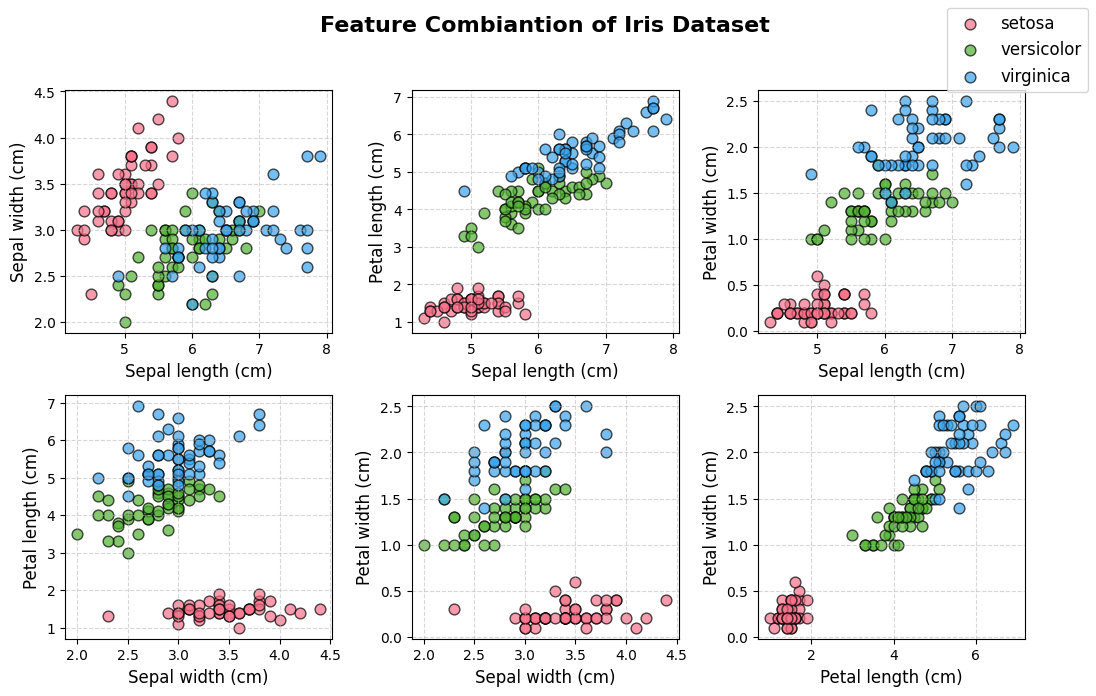

In [5]:
target_names = iris.target_names
palette = sns.color_palette("husl", 3)  # Color Palette

# Subplots for each feature combination
fig, axs = plt.subplots(2, 3, figsize=(11, 7))
fig.suptitle("Feature Combiantion of Iris Dataset", fontsize=16, fontweight='bold')
axs = axs.flatten()

plot_idx = 0
for i in range(4):
    for j in range(i + 1, 4): 
        for color, label, target_name in zip(palette, np.unique(y), target_names):
            axs[plot_idx].scatter(X[y == label, i], X[y == label, j], 
                                  label=target_name if plot_idx == 0 else "", 
                                  color=color, alpha=0.7, edgecolor='k', s=60)
        
        # Add labels and imporve appearence
        axs[plot_idx].set_xlabel(iris.feature_names[i].capitalize(), fontsize=12)
        axs[plot_idx].set_ylabel(iris.feature_names[j].capitalize(), fontsize=12)
        axs[plot_idx].tick_params(axis='both', which='major', labelsize=10)
        axs[plot_idx].grid(True, linestyle='--', alpha=0.5)
        plot_idx += 1

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", fontsize=12)
plt.tight_layout(rect=[0, 0, 0.95, 0.95])
plt.show()

In [6]:
mask = (y == 0) | (y==1)
X = X[mask]
y = y[mask]
X.shape, y.shape

((100, 4), (100,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((70, 4), (70,))

In [8]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f'F1 score: {f1_score(y_test, y_pred)}')

ValueError: operands could not be broadcast together with shapes (30,4) (70,) 